In [1]:
import numpy as np
from IPython.display import Image

This document serves to explain how the minimum distances are calculated by working through an example of a cube in a periodic box.  
Forward slash (\):
<center><img src="min-dist-figures\set_up.png" alt="set_up" width="800"/></center>

Backward slash (/):
<center><img src="min-dist-figures/set_up.png" alt="set_up" width="800"/></center>

<img src="min-dist-figures/set_up.png" />

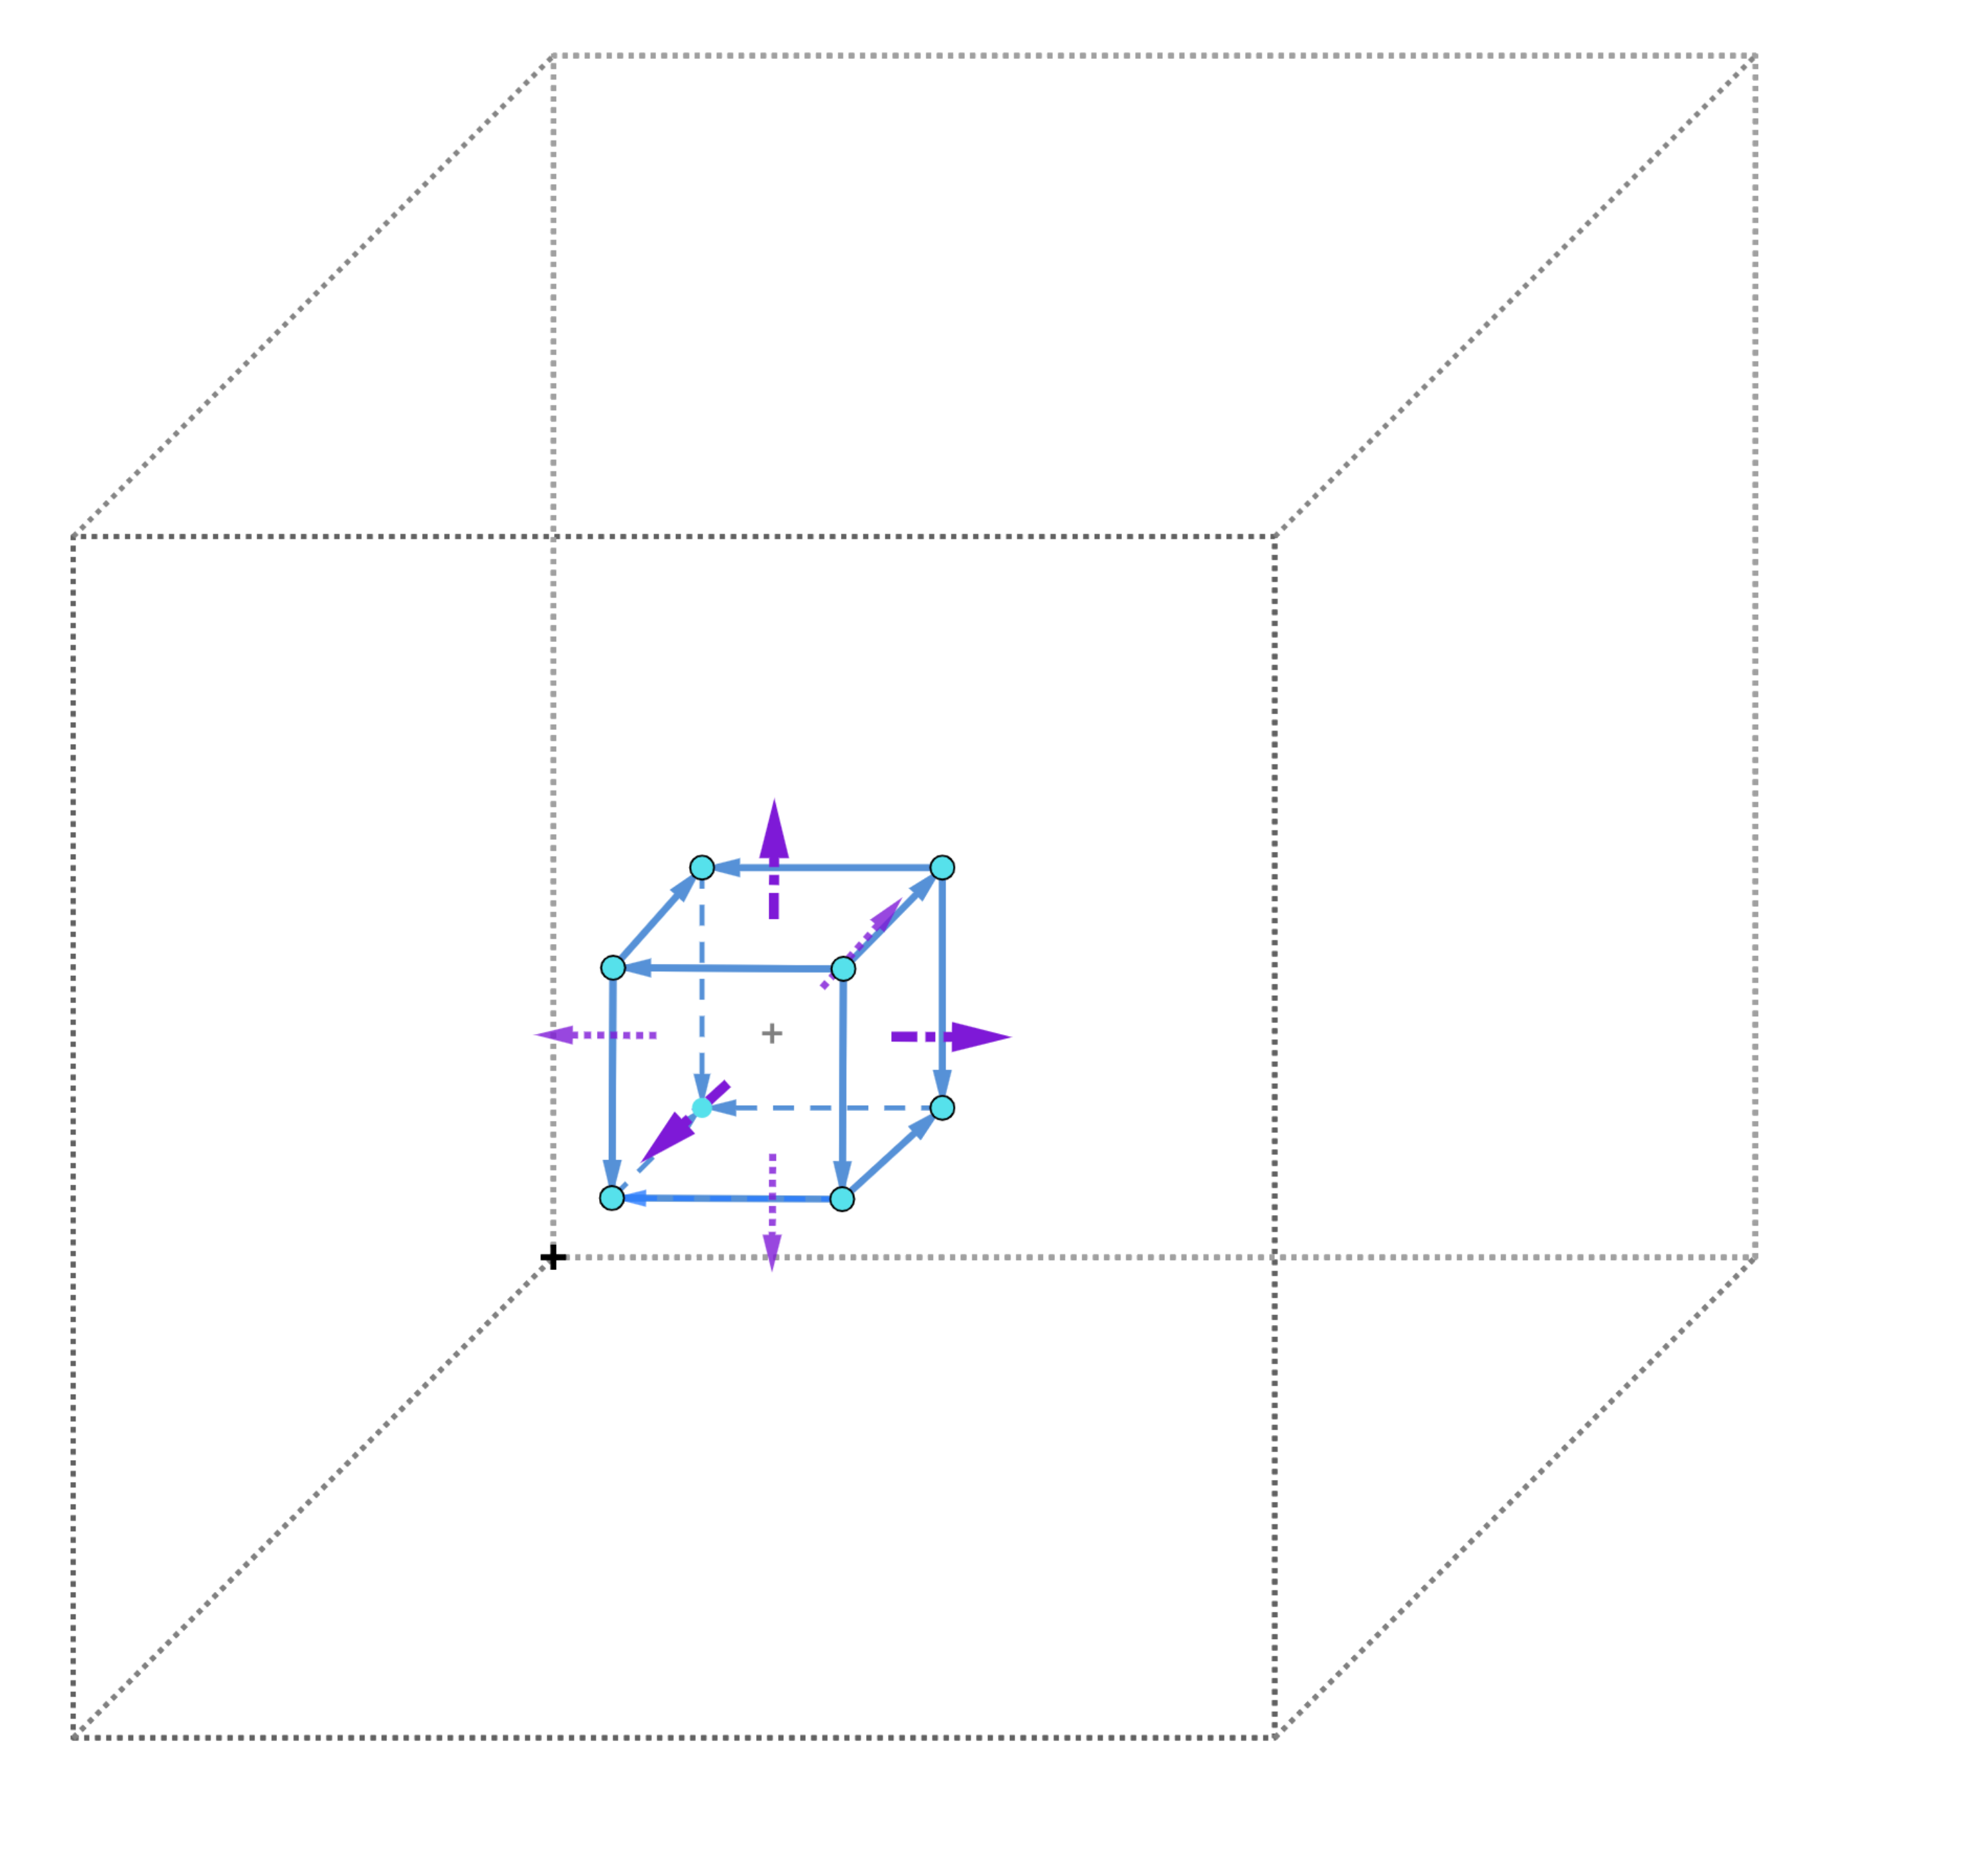

In [2]:
Image("min-dist-figures/set_up.png")

## Set up
First, we need to define our system. For this example, we will have a single cube of position (3,3,3) inside a cubic periodic box of size 10x10x10. 
<center><img src="min-dist-figures/zoom_in_set_up.png" alt="zoom_in_set_up" width="800"/></center>


We will define the vertices of the cube as:
$$\mathbf{V} = \begin{bmatrix} \mathbf{v_1}\\ \mathbf{v_2}\\ \mathbf{v_3}\\ \mathbf{v_4}\\ \mathbf{v_5}\\ \mathbf{v_6}\\ \mathbf{v_7}\\ \mathbf{v_8} \end{bmatrix} = \begin{bmatrix*}[r] 1&1&1\\ -1&1&1\\ 1&-1&1\\ 1&1&-1\\ -1&-1&1\\ -1&1&-1\\ 1&-1&-1\\ -1&-1&-1 \end{bmatrix*}$$

The vertices of any shape are user defined. In this example, the vertices are defined with the origin as the center of the cube, but it is not a requirement to have the origin as the center of the shape when defining the vertices.

From the vertices, we can get the edge vectors, which are taken to be the difference between the two corresponding vertices for each edge. We define two variables: edge-vertex neighbors ($\mathbf{N_{vert}}$) and edges ($\mathbf{E}$), where $\mathbf{N_{vert}}$ contains the corresponding vertices for each edge, and $\mathbf{E}$ contains the difference between the vertices in the two columns of $\mathbf{N_{vert}}$:
$$\mathbf{N_{vert}} = \begin{bmatrix} \mathbf{v_1}&\mathbf{v_2}\\ \mathbf{v_1}&\mathbf{v_3}\\ \mathbf{v_1}&\mathbf{v_4}\\ \mathbf{v_2}&\mathbf{v_5}\\ \mathbf{v_2}&\mathbf{v_6}\\ \mathbf{v_3}&\mathbf{v_5}\\ \mathbf{v_3}&\mathbf{v_7}\\ \mathbf{v_4}&\mathbf{v_6}\\ \mathbf{v_4}&\mathbf{v_7}\\ \mathbf{v_5}&\mathbf{v_8}\\ \mathbf{v_6}&\mathbf{v_8}\\ \mathbf{v_7}&\mathbf{v_8} \end{bmatrix}$$

(Note: In the code, the edge-vertex neighbors variable contains only integer values, which correspond to the indices of the vertices)

$$\mathbf{E} = \begin{bmatrix} \mathbf{e_1}\\ \mathbf{e_2}\\ \mathbf{e_3}\\ \mathbf{e_4}\\ \mathbf{e_5}\\ \mathbf{e_6}\\ \mathbf{e_7}\\ \mathbf{e_8}\\ \mathbf{e_9}\\ \mathbf{e_{10}}\\ \mathbf{e_{11}}\\ \mathbf{e_{12}} \end{bmatrix} = \begin{bmatrix} \mathbf{v_2}-\mathbf{v_1}\\ \mathbf{v_3}-\mathbf{v_1}\\ \mathbf{v_4}-\mathbf{v_1}\\ \mathbf{v_5}-\mathbf{v_2}\\ \mathbf{v_6}-\mathbf{v_2}\\ \mathbf{v_5}-\mathbf{v_3}\\ \mathbf{v_7}-\mathbf{v_3}\\ \mathbf{v_6}-\mathbf{v_4}\\ \mathbf{v_7}-\mathbf{v_4}\\ \mathbf{v_8}-\mathbf{v_5}\\ \mathbf{v_8}-\mathbf{v_6}\\ \mathbf{v_8}-\mathbf{v_7} \end{bmatrix} = \begin{bmatrix*}[r] -2&0&0\\ 0&-2&0\\ 0&0&-2\\ 0&-2&0\\ 0&0&-2\\ -2&0&0\\ 0&0&-2\\ -2&0&0\\ 0&-2&0\\ 0&0&-2\\ 0&-2&0\\ -2&0&0 \end{bmatrix*}$$

For a cube, the normals of the faces are calculated by taking the cross product of two adjacent edges. In the code, the software package, Coxeter, is used to calculate the normals. For this example, the normals of the faces are:
$$\mathbf{F} = \begin{bmatrix} \mathbf{f_1}\\ \mathbf{f_2}\\ \mathbf{f_3}\\ \mathbf{f_4}\\ \mathbf{f_5}\\ \mathbf{f_6} \end{bmatrix} = \begin{bmatrix} \mathbf{e_1} \times \mathbf{e_2}\\ \mathbf{e_3} \times \mathbf{e_1}\\ \mathbf{e_2} \times \mathbf{e_3} \\ \mathbf{e_5} \times \mathbf{e_4} \\ \mathbf{e_6} \times \mathbf{e_7} \\ \mathbf{e_9} \times \mathbf{e_8} \end{bmatrix} = \begin{bmatrix*}[r] 0&0&4\\ 0&4&0\\ 4&0&0\\ -4&0&0\\ 0&-4&0\\ 0&0&-4 \end{bmatrix*}$$

We also define another variable, edge-face neighbors ($\mathbf{M_{face}}$), which contains the corresponding faces for each edge. If an edge vector is oriented such that it is pointing upwards, the face on its left corresponds with the first column and the face on its right corresponds with the second column of the respective edge in edge-face neighbors.
$$\mathbf{M_{face}}  = \begin{bmatrix} \mathbf{f_1}&\mathbf{f_2}\\ \mathbf{f_3}&\mathbf{f_1}\\ \mathbf{f_2}&\mathbf{f_3}\\ \mathbf{f_1}&\mathbf{f_4}\\ \mathbf{f_4}&\mathbf{f_2}\\ \mathbf{f_5}&\mathbf{f_1}\\ \mathbf{f_3}&\mathbf{f_5}\\ \mathbf{f_2}&\mathbf{f_6}\\ \mathbf{f_6}&\mathbf{f_3}\\ \mathbf{f_5}&\mathbf{f_4}\\ \mathbf{f_4}&\mathbf{f_6}\\ \mathbf{f_6}&\mathbf{f_5} \end{bmatrix}$$

(Note: In the code, the edge-face neighbors variable contains only integer values, which correspond to the indices of the faces)

## What is a Zone?
We define a zone such that these two variables, $\mathbf{A}$ and $\mathbf{a}$, satisfy this condition for all grid points, $\mathbf{x}$, located within the zone:
$$\mathbf{A} \cdot \mathbf{x} \leq \mathbf{a}$$

The matrix $\mathbf{A}$ contains the normals (pointing outward from the zone) of all the planar boundaries associated with the zone, and the vector $\mathbf{a}$ contains the bounds.

_(Note: The magnitudes of the normals in matrix $\mathbf{A}$ cancel out with the bounds $\mathbf{a}$ and so are negligible.)__

## Vertex Zone Example

We will now work through how a vertex zone is created and how the minimum distance calculations are done for the grid points that exist within this vertex zone.

For this example, we will look at the zone created by vertex $\mathbf{v_4}$. First, we will calculate the corresponding $\mathbf{A}$ matrix, which we will call $\mathbf{P}$. The values for matrix $\mathbf{P}$ are found to be the corresponding edges to vertex $\mathbf{v_4}$ in the direction pointing away from the vertex. By looking at $\mathbf{N_{vert}}$, we see that edges $\mathbf{e_3}$, $\mathbf{e_8}$, and $\mathbf{e_9}$ correspond with vertex $\mathbf{v_4}$. For $\mathbf{e_3}$, we see that $\mathbf{v_4}$ is in the second column of $\mathbf{N_{vert}}$, which tells us that the vector $\mathbf{e_3}$ is pointing towards $\mathbf{v_4}$, so we need to take the negative of vector $\mathbf{e_3}$ when calculating $\mathbf{P}$. For $\mathbf{e_8}$ and $\mathbf{e_9}$, $\mathbf{v_4}$ is in the first column of $\mathbf{N_{vert}}$, which tells us that the vectors $\mathbf{e_8}$ and $\mathbf{e_9}$ are pointing away from $\mathbf{v_4}$. Therefore, $\mathbf{P}$ is found to be:
$$\mathbf{P} = \begin{bmatrix*}[r] -\mathbf{e_3}\\ \mathbf{e_8}\\ \mathbf{e_9} \end{bmatrix*} = \begin{bmatrix*}[r] 0&0&2\\ -2&0&0\\ 0&-2&0 \end{bmatrix*}$$

Now we can calculate the corresponding $\mathbf{a}$ vector, which we will call $\mathbf{p}$. The values in $\mathbf{p}$ are calculated by taking the dot product between each plane in $\mathbf{P}$ with a point that lies on the respective plane. For vertex zones, the corresponding vertex lies in all the planes in $\mathbf{P}$. We have to keep in mind that the origin of our periodic box is different from the origin we set when defining our vertices, so we have to add the position of the cube to our vertex. For our example, $\mathbf{p}$ is found to be:
$$\mathbf{p} = \mathbf{P} \cdot \begin{pmatrix} \mathbf{v_4} + \begin{bmatrix} 3&3&3 \end{bmatrix} \end{pmatrix} = \begin{bmatrix*}[r] 0&0&2\\ -2&0&0\\ 0&-2&0 \end{bmatrix*} \begin{bmatrix*}[r] 4\\ 4\\ 2 \end{bmatrix*} = \begin{bmatrix*}[r] 4\\ -8\\ -8 \end{bmatrix*}$$

(Note: ___magnitudes___)

Edge zones + dist calc


Face zones + dist calc


Image bounds



